In [197]:
import pandas as pd
import numpy as np
from fastapi import FastAPI,  HTTPException
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
rows = []
with open("steam_games.json") as file:
    for line in file.readlines():
        rows.append(ast.literal_eval(line))

In [199]:
df = pd.DataFrame(rows)

In [200]:
df['release_date'] = pd.to_datetime(df["release_date"], errors='coerce')

In [201]:
df['release_date'] = df.release_date.dt.strftime('%Y-%m-%d')

Valores nulos del dataframe

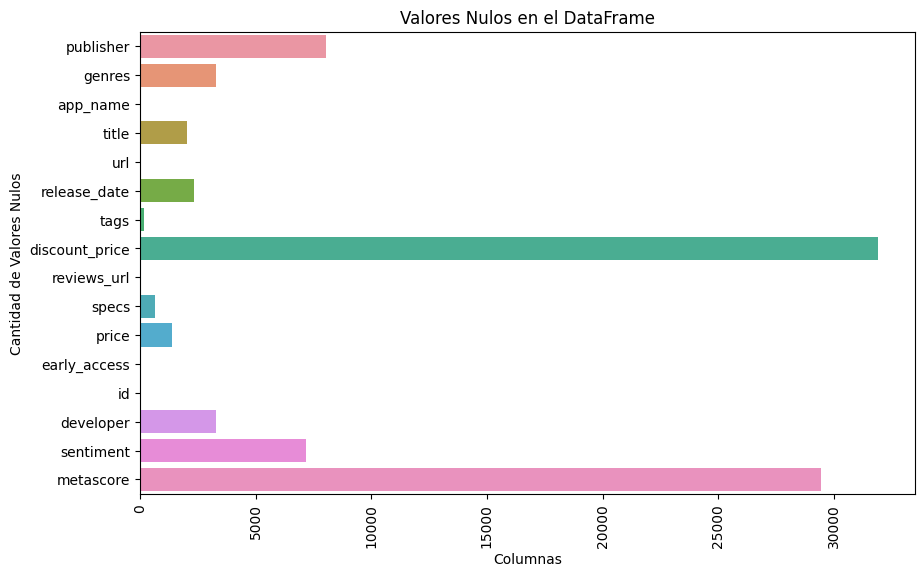

In [202]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.isna().sum(), y=df.columns)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos en el DataFrame')
plt.show()

Eliminamos columnas innecesarias

In [203]:
df = df.drop(['publisher','url', 'tags','title' ,'discount_price', 'reviews_url','id','developer'], axis=1)

Como queda el dataframe sin columna innecesarias

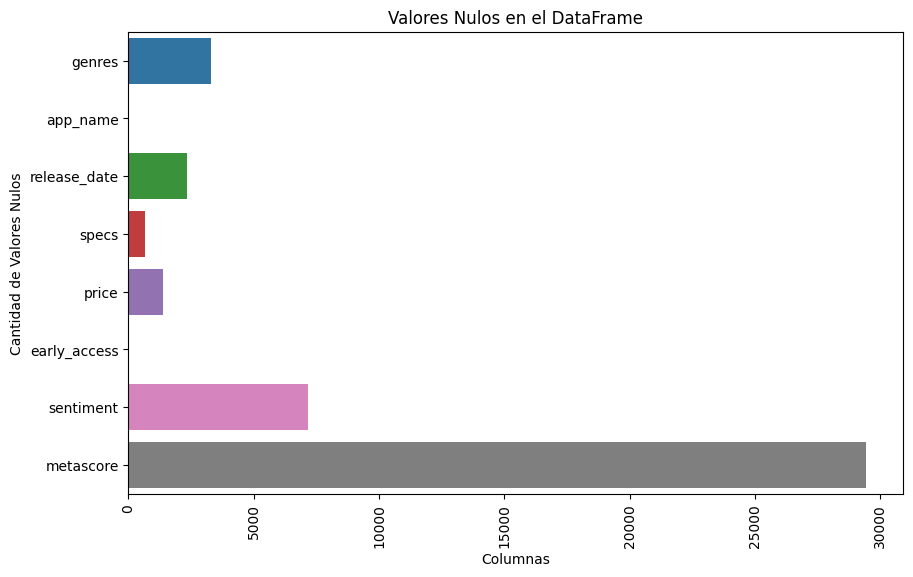

In [204]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.isna().sum(), y=df.columns)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos en el DataFrame')
plt.show()

Tratamos a los nulos de metascore para tenerlos en cuenta

In [205]:
df.metascore.unique()

array([nan, 96, 84, 80, 76, 70, 'NA', 69, 81, 75, 72, 66, 67, 77, 91, 89,
       83, 61, 88, 65, 94, 57, 86, 87, 92, 79, 82, 58, 74, 85, 90, 68, 71,
       60, 73, 59, 64, 54, 53, 78, 51, 44, 63, 38, 56, 49, 52, 62, 93, 48,
       34, 95, 43, 55, 24, 46, 41, 20, 39, 45, 35, 47, 40, 36, 50, 32, 37,
       33, 42, 27, 29, 30], dtype=object)

In [206]:
print(df.sentiment.isna().sum())
print(df.metascore.isna().sum())

7182
29458


In [207]:
df.loc[df['metascore'] == 'NA', 'metascore'] = 0

In [208]:
df["metascore"].fillna(0,inplace=True)

No cambiamos el tipo de dato de metascore ya que al rellenarlo con ceros se cambia a int automaticamente

Ahora tratamos los nulos de sentiment

In [209]:
df.sentiment.unique()

array([nan, 'Mostly Positive', 'Mixed', '1 user reviews',
       '3 user reviews', '8 user reviews', 'Very Positive',
       'Overwhelmingly Positive', '6 user reviews', '5 user reviews',
       '2 user reviews', 'Very Negative', 'Positive', 'Mostly Negative',
       '9 user reviews', 'Negative', '4 user reviews', '7 user reviews',
       'Overwhelmingly Negative'], dtype=object)

In [210]:
df["sentiment"].fillna("unknown",inplace=True)

In [164]:
# Definimos el filtro para las filas que deseamos reemplazar (las de pocos reviews)
sentimentreviews = (df['sentiment'] == '1 user reviews') | (df['sentiment'] == '3 user reviews') | \
         (df['sentiment'] == '8 user reviews') | (df['sentiment'] == '6 user reviews') | \
         (df['sentiment'] == '5 user reviews') | (df['sentiment'] == '2 user reviews') | \
         (df['sentiment'] == '9 user reviews') | (df['sentiment'] == '4 user reviews') | \
         (df['sentiment'] == '7 user reviews') 

In [211]:
df.loc[sentimentreviews, 'sentiment'] = "Few Reviews"

In [212]:
# Cambiamos el tipo de dato de sentiment a categórico
df["sentiment"] = df["sentiment"].astype("category")

Eliminamos nulos de las fechas

In [213]:
df.release_date.isna().sum()

2352

In [214]:
df = df.dropna(subset=['release_date'])

In [215]:
# Cambiamos a tipo date las fechas
df["release_date"] = pd.to_datetime(df["release_date"])

In [216]:
#Creamos una columna de años para las fechas
df['año'] = df['release_date'].dt.year

In [217]:
#Eliminamos duplicados de los nombres de los juegos
df.drop_duplicates(subset=['app_name'], inplace=True)

Eliminamos nulos de los precios, genres y specs

In [218]:
df = df.dropna(subset=['price'])

In [219]:
df = df.dropna(subset=['genres'])

In [220]:
df = df.dropna(subset=['specs'])

In [221]:
df.price.unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 3.99, 9.99, 18.99,
       29.99, 10.99, 2.99, 1.59, 14.99, 1.99, 59.99, 8.99, 6.99, 7.99,
       39.99, 'Free', 19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25, 24.99,
       17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo', 'Play for Free!',
       34.99, 1.49, 32.99, 99.99, 14.95, 69.99, 16.99, 79.99, 49.99, 5.0,
       44.99, 13.98, 109.99, 149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99,
       'Free Mod', 54.99, 74.99, 'Install Theme', 0.89, 'Third-party',
       0.5, 'Play Now', 299.99, 1.29, 119.99, 3.0, 15.0, 5.49, 23.99,
       20.99, 1.39, 'Free HITMAN™ Holiday Pack', 36.99, 4.49, 2.0, 4.0,
       1.95, 1.5, 6.66, 27.99, 26.99, 399.99, 31.99, 20.0, 40.0, 3.33,
       22.99, 38.85, 71.7, 995.0, 27.49, 3.39, 6.0, 19.95, 499.99, 199.99,
       16.06, 4.68, 131.4, 44.98, 202.76, 2.3, 0.95, 172.24, 249.99, 2.97,
       10.96, 10.0, 30.0, 2.66, 6.48, 1.0, 11.15, 'Play the Demo

A continuacion, reemplazamos aquellos valores por 0 que den indicio de que el juego es gratis

In [222]:
# Estos valores no son juegos gratuitos
df.drop(df[(df['price'] == 'Install Theme') | (df['price'] == 'Third-party') | (df['price'] == 'Play Now' )].index,inplace=True)

In [223]:
# Definimos el filtro para las filas que deseamos reemplazar
free_games = (df['price'] == 'Free To Play') | (df['price'] == 'Free Demo') | (df['price'] == 'Free to Play') | \
         (df['price'] == 'Play for Free!') | (df['price'] == 'Install Now') | (df['price'] == 'Free Mod') | \
         (df['price'] == 'Free HITMAN™ Holiday Pack') | (df['price'] == 'Play the Demo') | \
         (df['price'] == 'Play WARMACHINE: Tactics Demo') | (df['price'] == 'Free Movie') | \
         (df['price'] == 'Free to Use')  | (df['price'] == 'Free')| \
         (df['price'] == 'Free to Try')    

In [224]:
# Aplicamos el reemplazo usando el filtro
df.loc[free_games, 'price'] = 0

In [225]:
precio1 = (df['price'] == 'Starting at $499.00')
precio2 = (df['price'] == 'Starting at $449.00')

In [226]:
df.loc[precio1, 'price'] = 499
df.loc[precio2, 'price'] = 449

In [227]:
# Cambiamos el tipo de dato de price a float
df["price"]=df["price"].astype(float)

In [228]:
df["genres"].fillna("unknown",inplace=True)
df["specs"].fillna("unknown",inplace=True)

Exportamos

In [229]:
df.to_csv('nuevos_datos.csv')

Leemos el nuevo json y creamos las funciones

In [232]:
df_limpio = pd.read_csv('nuevos_datos.csv')

In [233]:
# Cambiamos a tipo date las fechas
df_limpio["release_date"] = pd.to_datetime(df_limpio["release_date"])

In [234]:
# Cambiamos el tipo de dato de sentiment a categórico
df_limpio["sentiment"] = df_limpio["sentiment"].astype("category")

In [235]:
app = FastAPI(title='Proyecto de Machine Learning Operations de juegos de Steam')

In [236]:
@app.get('/genero/{anio}')
def genero(anio):
    try:
        # Validar que el año sea un valor numérico válido
        anio_entero = int(anio)
    except ValueError:
        raise HTTPException(status_code=400, detail='El año proporcionado no es válido.')
   # Filtrar los registros del año ingresado
    df_anio = df_limpio[df_limpio['año'] == int(anio)]

    if df_anio.empty:
        raise HTTPException(status_code=404, detail='No se encontraron juegos para el año proporcionado.')

    # Contar la frecuencia de cada género
    generos_contados = df_anio['genres'].explode().value_counts()

    # Tomar los 5 géneros más vendidos
    top_generos = generos_contados.head(5)

    # Obtener la lista de géneros junto con su posición en la lista
    top_generos_con_posicion = [(posicion + 1, genero) for posicion, genero in enumerate(top_generos.index)]

    return top_generos_con_posicion

In [237]:
genero(2018)

[(1, "['Free to Play', 'Indie', 'Simulation', 'Sports']"),
 (2, "['Action', 'Adventure', 'Indie']"),
 (3, "['Indie']"),
 (4, "['Casual', 'Indie']"),
 (5, "['Action', 'Indie']")]

In [238]:
@app.get('/juegos/{anio}')
def juegos(anio):
    try:
        # Validar que el año sea un valor numérico válido
        anio_entero = int(anio)
    except ValueError:
        raise HTTPException(status_code=400, detail='El año proporcionado no es válido.')

    # Filtrar los registros del año ingresado
    df_anio = df_limpio[df_limpio['año'] == anio_entero]

    if df_anio.empty:
        raise HTTPException(status_code=404, detail='No se encontraron juegos para el año proporcionado.')

    # Obtener los juegos lanzados en ese año
    juegos_lanzados = df_anio['app_name'].tolist()

    return juegos_lanzados

In [239]:
juegos(2018)

['Lost Summoner Kitty',
 'Ironbound',
 'Battle Royale Trainer',
 'SNOW - All Access Basic Pass',
 'SNOW - All Access Pro Pass',
 'SNOW - All Access Legend Pass',
 'Army of Tentacles: (Not) A Cthulhu Dating Sim: Black GOAT of the Woods Edition',
 'Beach Rules',
 'Planetarium 2 - Zen Odyssey',
 'The first thrust of God',
 'SNOW - Starter Pack',
 'The first thrust of God - All Aircrafts',
 'SNOW - Lifetime Pack',
 'The Warrior Of Treasures',
 'DinoBlaster',
 'Vaporwave Simulator',
 'Underdone - Soundtrack',
 'Bitcoin Clicker',
 'Shotgun Legend',
 'Epic Cards Battle 2-Dragons Rising(TCG)',
 'HORDE ATTACK',
 'MagiCat Original Soundtrack',
 'Reality Incognita',
 'Island Build Masters',
 'Fresh Body: Original Soundtrack',
 'Nightshade Additional Scenarios',
 'Regions Of Ruin',
 'The Last Mission',
 'Tap Adventure: Time Travel - Promo Pack',
 'INTRUDER - WAR AREAS',
 'Diesel Guns',
 'Albino Lullaby: Episode 3',
 "Alice's Lullaby: Episode 2",
 'Empires Of Creation',
 'Divinia Chronicles: Relics

In [240]:
@app.get('/specs/{anio}')
def specs(anio):
    try:
        # Validar que el año sea un valor numérico válido
        anio_entero = int(anio)
    except ValueError:
        raise HTTPException(status_code=400, detail='El año proporcionado no es válido.')

    # Filtrar los registros del año ingresado
    df_anio = df_limpio[df_limpio['año'] == anio_entero]

    if df_anio.empty:
        raise HTTPException(status_code=404, detail='No se encontraron juegos para el año proporcionado.')

    # Contar las especificaciones más comunes
    specs_contados = df_anio['specs'].explode().value_counts()

    # Obtener las 5 especificaciones más comunes junto con su posición
    top_specs = specs_contados.head(5)
    top_specs_con_posicion = [(posicion + 1, espec) for posicion, espec in enumerate(top_specs.index)]

    return top_specs_con_posicion

In [241]:
specs(2000)

[(1, "['Single-player']"),
 (2, "['Single-player', 'Multi-player']"),
 (3, "['Single-player', 'Steam Cloud']"),
 (4, "['Multi-player', 'Valve Anti-Cheat enabled']"),
 (5, "['Single-player', 'Shared/Split Screen', 'Steam Trading Cards']")]

In [242]:
@app.get('/earlyaccess/{anio}')
def earlyaccess(anio):
    try:
        # Validar que el año sea un valor numérico válido
        anio_entero = int(anio)
    except ValueError:
        raise HTTPException(status_code=400, detail='El año proporcionado no es válido.')

    # Filtrar los registros del año ingresado y que estén en early access
    df_anio_early_access = df_limpio[(df_limpio['año'] == anio_entero) & (df_limpio['early_access'] == True)]

    if df_anio_early_access.empty:
        raise HTTPException(status_code=404, detail='No se encontraron juegos en early access para el año proporcionado.')

    # Obtener la cantidad de juegos en early access
    cantidad_early_access = df_anio_early_access.shape[0]

    return cantidad_early_access

In [243]:
earlyaccess(2018)

18

In [244]:
@app.get('/sentiment/{anio}')
def sentiment(anio):
    try:
        # Validar que el año sea un valor numérico válido
        anio_entero = int(anio)
    except ValueError:
        raise HTTPException(status_code=400, detail='El año proporcionado no es válido.')

    # Filtrar los registros del año ingresado
    df_anio = df_limpio[df_limpio['año'] == anio_entero]

    if df_anio.empty:
        raise HTTPException(status_code=404, detail='No se encontraron registros para el año proporcionado.')

    # Obtener el conteo de las categorías de sentimiento
    conteo_categorias = df_anio['sentiment'].value_counts()

    return conteo_categorias.to_dict()

In [245]:
sentiment(2018)

{'unknown': 28,
 'Few Reviews': 27,
 'Mixed': 6,
 'Mostly Positive': 3,
 'Very Positive': 3,
 'Mostly Negative': 1,
 'Negative': 0,
 'Overwhelmingly Negative': 0,
 'Overwhelmingly Positive': 0,
 'Positive': 0,
 'Very Negative': 0}

In [246]:
@app.get('/metascore/{anio}')
def metascore(anio):
    try:
        # Validar que el año sea un valor numérico válido
        anio_entero = int(anio)
    except ValueError:
        raise HTTPException(status_code=400, detail='El año proporcionado no es válido.')

    # Filtrar los registros del año ingresado
    df_anio = df_limpio[df_limpio['año'] == anio_entero]

    if df_anio.empty:
        raise HTTPException(status_code=404, detail='No se encontraron registros para el año proporcionado.')

    # Ordenar los juegos por su puntaje (metascore) en orden descendente
    df_ordenado = df_anio.sort_values(by='metascore', ascending=False)

    # Tomar los 5 juegos con mayor puntaje
    top_5_juegos = df_ordenado.head(5)

    return top_5_juegos[['app_name', 'metascore']].to_dict(orient='records')

In [247]:
metascore(2018)

[{'app_name': 'Lost Summoner Kitty', 'metascore': 0},
 {'app_name': 'Christmas Tale - Visual Novel', 'metascore': 0},
 {'app_name': 'SCP-087: Recovered document', 'metascore': 0},
 {'app_name': 'Prison Bomber', 'metascore': 0},
 {'app_name': 'Rheksetor: Waves of Fury', 'metascore': 0}]